In [2]:
import pennylane as qml
from pennylane import numpy as np

In [3]:
def bernstein_vazirani(s):
    n = len(s)
    for i in range(n):
        qml.Hadamard(i)
    qml.Hadamard(n)
    qml.PauliZ(n)
    #s = s[::-1]
    for q in range(n):
        if s[q] == '1':
            qml.CNOT(wires=[q, n])
        else:
            qml.Identity(wires=q)
    for i in range(n):
        qml.Hadamard(i)

The secret bit-string:  10101


The probability distribution for the secret bit-string is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

The quantum circuit is:


(<Figure size 900x700 with 1 Axes>, <Axes:>)

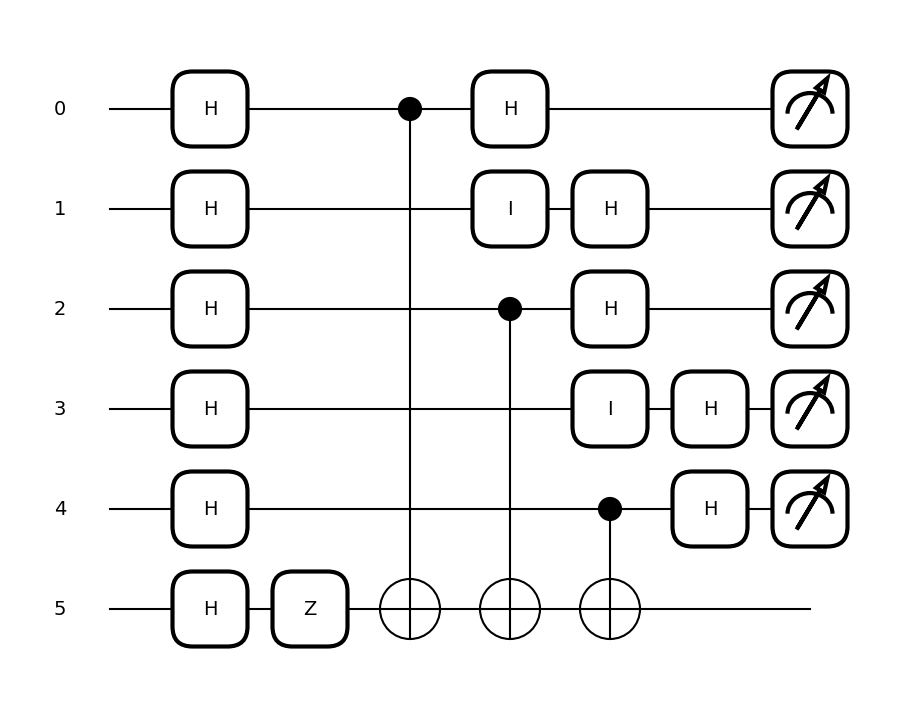

In [31]:
string = input("The secret bit-string: ")
n = len(string)
device = qml.device('default.qubit', wires=n+1)
@qml.qnode(device)
def bernstein_vazirani_circuit(s : str):
    n_ = len(s)
    bernstein_vazirani(s)
    return qml.probs(wires=range(n_))

print("The probability distribution for the secret bit-string is:", bernstein_vazirani_circuit(string))
print("\nThe quantum circuit is:")
qml.draw_mpl(bernstein_vazirani_circuit)(string)

#### Noisy Bernstein-Vazirani Circuit

Secret bit-string:  10101


The probability distribution for the secret bit-string is:
 [0.04195371 0.03003504 0.01168978 0.00836882 0.03003504 0.07420855
 0.00836882 0.02067711 0.01168978 0.00836882 0.00325718 0.00233185
 0.00836882 0.02067711 0.00233185 0.00576137 0.03003504 0.07420855
 0.00836882 0.02067711 0.07420855 0.25697084 0.02067711 0.0716011
 0.00836882 0.02067711 0.00233185 0.00576137 0.02067711 0.0716011
 0.00576137 0.01995058]

The quantum circuit is:


(<Figure size 1300x700 with 1 Axes>, <Axes:>)

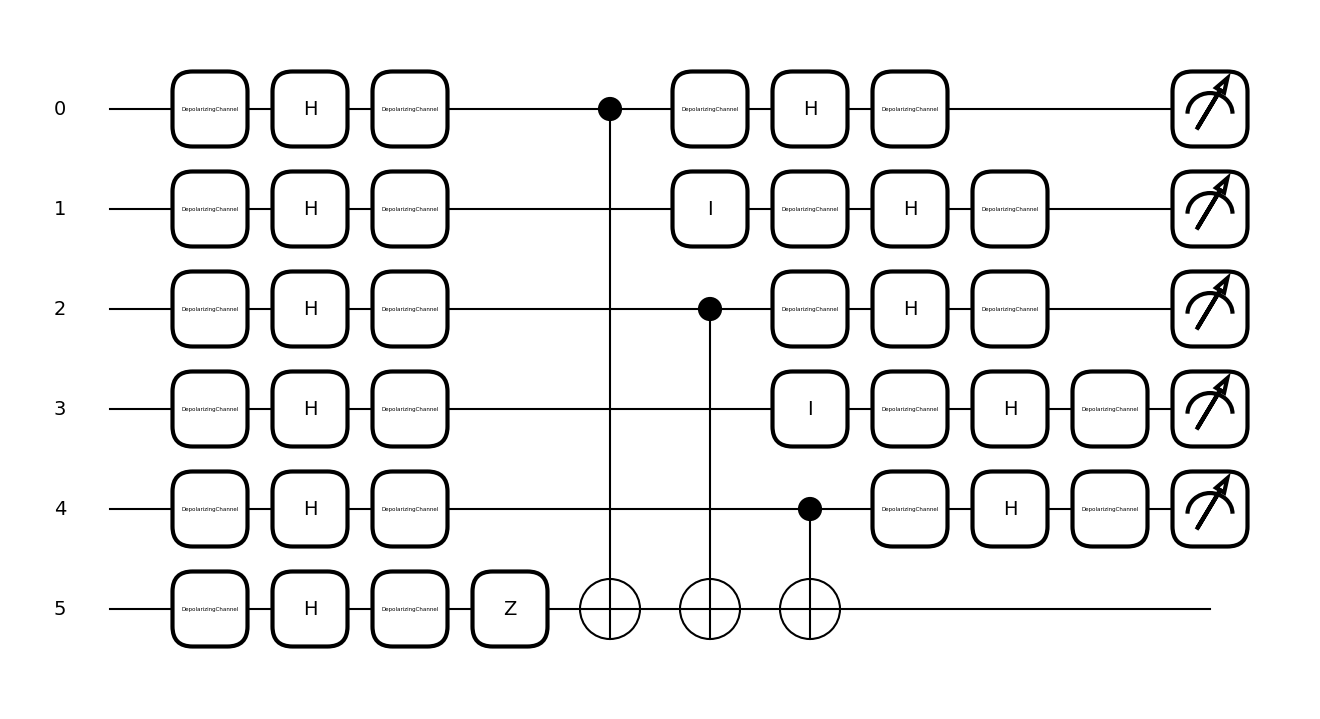

In [30]:
def noisy_Hadamard(lmbda, wire):
    """A Hadamard gate with depolarizing noise on either side.
    
    Args:
        lmbda (float): The parameter defining the depolarizing channel.
        wire (int): The wire the depolarizing channel acts on.
    """
    qml.DepolarizingChannel(lmbda, wires=wire)
    qml.Hadamard(wire)
    qml.DepolarizingChannel(lmbda, wires=wire)

# Oracle matrix for Doc Trine's cell number

flips = [1, 3, 5, 7, 8, 10, 12, 14, 16, 18, 20, 22, 25, 27, 29, 31]

oracle_matrix = np.eye(2**5)
for i in flips:
    oracle_matrix[i, i] = -1

# Implement the Bernstein-Vazirani algorithm with depolarizing noise

s = input("Secret bit-string: ")
N = len(s)
l = 0.1

dev = qml.device("default.mixed", wires = N+1)
@qml.qnode(dev)
def noisy_BernsteinVazirani(lmbda, string):
    """Runs the Bernstein-Vazirani algorithm with depolarizing noise.

    Args:
        lmbda (float): The probability of erasing the state of a qubit.

    Returns:
        (list(float)): Expectation values for PauliZ on all n wires.
    """
    n = len(string)
    for i in range(n+1):
        noisy_Hadamard(lmbda, wire=i)
    qml.PauliZ(n)
    for q in range(n):
        if string[q] == '1':
            qml.CNOT(wires=[q, n])
        else:
            qml.Identity(wires=q)
    for i in range(n):
        noisy_Hadamard(lmbda, wire=i)   
        
    return qml.probs(wires=[i for i in range(n)])

print("The probability distribution for the secret bit-string is:\n", noisy_BernsteinVazirani(l, s))
print("\nThe quantum circuit is:")
qml.draw_mpl(noisy_BernsteinVazirani)(l, s)

In [42]:
np.eye(2**5).shape

(32, 32)

In [32]:
p = noisy_BernsteinVazirani(l, s)

In [34]:
p.max()

0.25697083908531765

In [35]:
p_perc = []
for i in p:
    p_ = i*100
    p_perc.append(p_)
p_perc = np.array(p_perc)
p_perc

tensor([ 4.19537122,  3.0035038 ,  1.16897773,  0.83688162,  3.0035038 ,
         7.42085468,  0.83688162,  2.06771068,  1.16897773,  0.83688162,
         0.32571824,  0.2331846 ,  0.83688162,  2.06771068,  0.2331846 ,
         0.5761368 ,  3.0035038 ,  7.42085468,  0.83688162,  2.06771068,
         7.42085468, 25.69708391,  2.06771068,  7.16010986,  0.83688162,
         2.06771068,  0.2331846 ,  0.5761368 ,  2.06771068,  7.16010986,
         0.5761368 ,  1.99505801], requires_grad=True)

In [36]:
p_perc.sum()

tensor(100., requires_grad=True)

In [37]:
np.eye(4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], requires_grad=True)